Attempted to identify relationships between all features in this dataset using plotly (which is simply an extended version of matplotlib) & matplotlib. Some of these graphs might not display on github. Please download this file to see all visualizations

In [1]:
import pandas as pd
import numpy as np

In [2]:
medical_df = pd.read_csv('insurance.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [7]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. Plotly is the same as seaborn when it comes to making charts. The only difference here is that the chart is interactive (useful for data exploration during project analysis)

In [8]:
fig = px.histogram(medical_df, x = 'age', marginal = 'box', nbins = 47, title = 'Distribution of Age')
fig.update_layout(bargap = 0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the number of people of any given age (between 18 & 64)

visualized the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot

In [9]:
fig = px.histogram(medical_df, x = 'bmi', marginal = 'box', color_discrete_sequence = ['red'], title = 'Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

Also visualized the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [10]:
fig = px.histogram(medical_df, x = 'charges', marginal = 'box', color = 'smoker' ,color_discrete_sequence = ['green', 'grey'], title = 'Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

For most customers, the annual medical charges are under \$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is 7300, the median for non-smokers is 35,000.

visualized the distribution of the "smoker" column (containing values "yes" and "no") using a histogram

In [11]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [12]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

It appears that 20% of customers have reported that they smoke

visualized the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points

In [13]:
fig = px.scatter(medical_df, x= 'age', y='charges', color = 'smoker', opacity=0.8, hover_data = ['sex'], title = 'Age vs. Charges')
fig.update_traces(marker_size = 5)
fig.show()

We can make the following observations from the above chart:

The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

 visualized the relationship between BMI (body mass index) and charges using another scatter plot.

In [14]:
fig = px.scatter(medical_df, x= 'bmi', y='charges', color = 'smoker', opacity=0.8, hover_data = ['sex'], title = 'BMI vs. Charges')
fig.update_traces(marker_size = 5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

Correlation: 

the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

used .corr function from the pandas lib to express this relationship numerically

The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

In [15]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [16]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [17]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

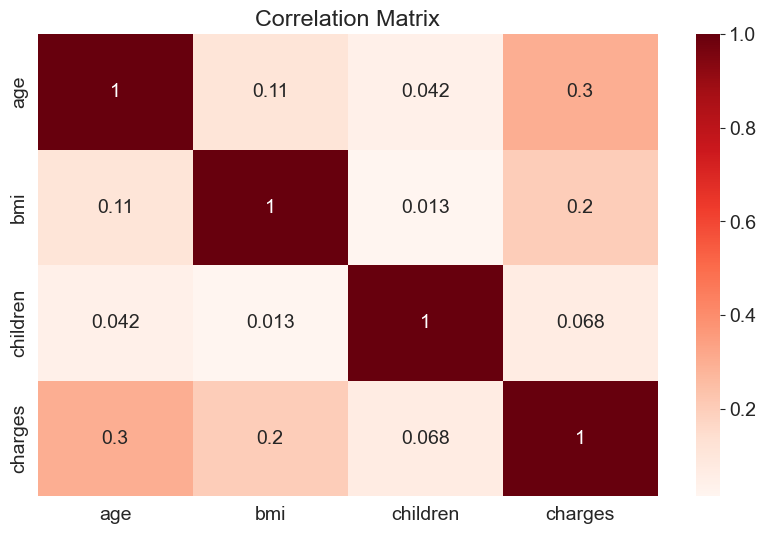

In [18]:
# Ensure that only numeric data is used
numeric_data = medical_df.select_dtypes(include=[np.number])

# Now create the heatmap using the filtered numeric data
sns.heatmap(numeric_data.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')
plt.show()


We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers

In [19]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

Next, let's visualize the relationship between "age" and "charges"

<Axes: title={'center': 'Age vs. Charges'}, xlabel='age', ylabel='charges'>

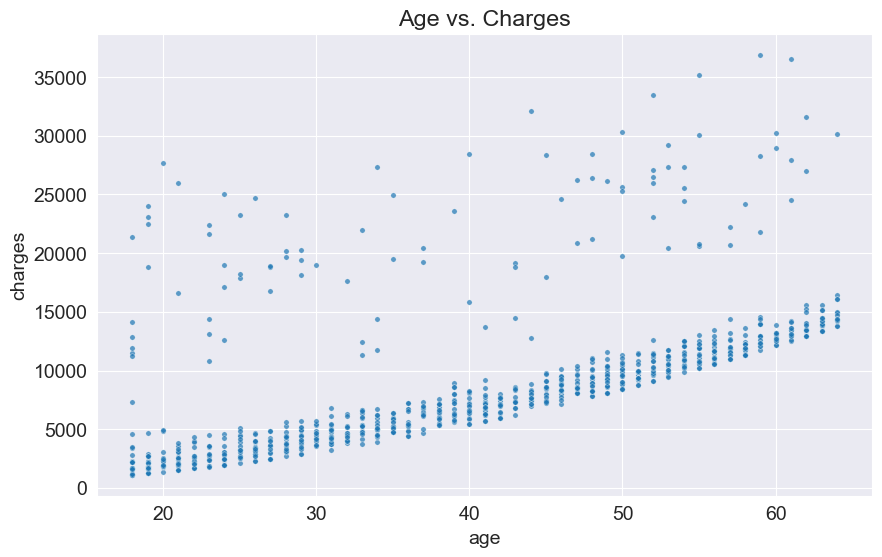

In [20]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

Apart from a few exceptions, the points seem to form a line. 

In [21]:
px.scatter(medical_df, x = 'children', y = 'charges')

We can see that the number of children isn't really a determining factor when it comes to medical charges